In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator

%matplotlib inline

# load data
data = pd.read_csv('un-general-debates.csv')

In [2]:
# data shape
print('data shape:', data.shape)

# data head
data.head()

data shape: (7507, 4)


,session,year,country,text
0,44,1989,MDV,﻿It is indeed a pleasure for me and the member...
1,44,1989,FIN,"﻿\nMay I begin by congratulating you. Sir, on ..."
2,44,1989,NER,"﻿\nMr. President, it is a particular pleasure ..."
3,44,1989,URY,﻿\nDuring the debate at the fortieth session o...
4,44,1989,ZWE,﻿I should like at the outset to express my del...


In [3]:
# look at first and last years in data
data.sort_values(by='year')[:3]

,session,year,country,text
174,25,1970,CAN,\nThe General Assembly is fortunate indeed to ...
171,25,1970,LBR,"49.\t It gives me great pleasure, Mr. Presiden..."
172,25,1970,KEN,"\n36.\t Mr. President, on behalf of His Excell..."


In [4]:
data.sort_values(by='year')[-3:]

,session,year,country,text
5476,70,2015,BOL,"I am enormously happy to be here, on behalf of..."
5485,70,2015,CRI,"Costa Rica would like to congratulate you, Sir..."
5548,70,2015,MYS,I would like to congratulate Mr. Mogens Lykket...


In [5]:
# convert text data to lower case (for easier analysis)
data['text'] = data['text'].str.lower()

# remove all data before 1971 -- looks like it might be incomplete
data = data[data['year'] > 1970]

In [6]:
data['char_count'] = data['text'].str.len()
data['words'] = data['text'].str.split(' ')
data['sentences'] = data['text'].str.split('.')
data['word_count'] = data['words'].str.len()
data['sentence_count'] = data['sentences'].str.len()
data['word_length'] = data['char_count'] / data['word_count']
data['sentence_length'] = data['word_count'] / data['sentence_count']

print('avg char count:', data['char_count'].mean())
print()
print('avg word count:', data['word_count'].mean())
print('avg word length:', data['word_length'].mean())
print()
print('avg sentence count:', data['sentence_count'].mean())
print('avg sentence len:', data['sentence_length'].mean())

avg char count: 17908.235713325266

avg word count: 2730.9312894984537
avg word length: 6.630625639900695

avg sentence count: 119.26744655102864
avg sentence len: 23.51915369650372


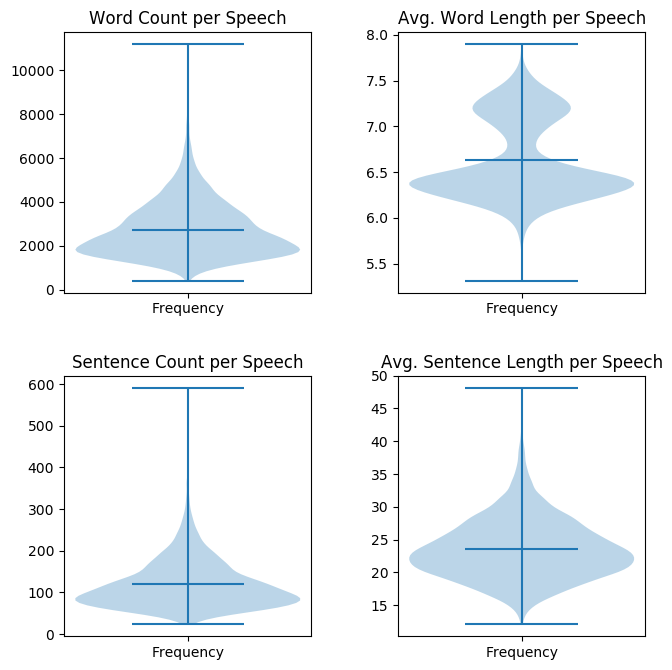

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7.5, 8))
all_data = [data]

# plot violin plot
axes[0, 0].violinplot(data['word_count'], showmeans=True, showmedians=False)
axes[0, 0].set_title('Word Count per Speech')

axes[0, 1].violinplot(data['word_length'], showmeans=True, showmedians=False)
axes[0, 1].set_title('Avg. Word Length per Speech')

axes[1, 0].violinplot(data['sentence_count'], showmeans=True, showmedians=False)
axes[1, 0].set_title('Sentence Count per Speech')

axes[1, 1].violinplot(data['sentence_length'], showmeans=True, showmedians=False)
axes[1, 1].set_title('Avg. Sentence Length per Speech')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))], xticklabels=['Frequency'])

fig.subplots_adjust(wspace=.35, hspace=.32)
plt.show()

In [8]:
# show top and bottom 5 countries by avg sentence count, avg word count,
# and avg sentence length

a = data['sentence_count'].groupby(data['country']).mean()
print('sentence_count')
print(a.sort_values(ascending=False)[:5])
print()
print(a.sort_values(ascending=False)[-5:])
print()

a = data['word_count'].groupby(data['country']).mean()
print('word_count')
print(a.sort_values(ascending=False)[:5])
print()
print(a.sort_values(ascending=False)[-5:])
print()
print()

a = data['sentence_length'].groupby(data['country']).mean()
print('sentence_length')
print(a.sort_values(ascending=False)[:5])
print()
print(a.sort_values(ascending=False)[-5:])
print()
print()

sentence_count
country
DEU    210.790698
RUS    210.733333
USA    200.800000
IRL    193.777778
FRA    171.488889
Name: sentence_count, dtype: float64

country
BRN    60.516129
UZB    59.500000
SMR    59.291667
MNE    56.100000
TON    54.933333
Name: sentence_count, dtype: float64

word_count
country
RUS    4240.577778
IRL    4109.244444
CUB    3951.511111
LBY    3938.186047
EGY    3792.477273
Name: word_count, dtype: float64

country
PLW    1434.222222
TON    1421.266667
LTU    1420.560000
UZB    1375.100000
BRN    1086.322581
Name: word_count, dtype: float64


sentence_length
country
VAT    29.992076
BHR    29.592585
TUN    29.066391
MAR    28.818642
PSE    28.581918
Name: sentence_length, dtype: float64

country
CHE    18.083795
NOR    17.552376
DEU    17.219644
FIN    17.071593
SWE    16.691306
Name: sentence_length, dtype: float64




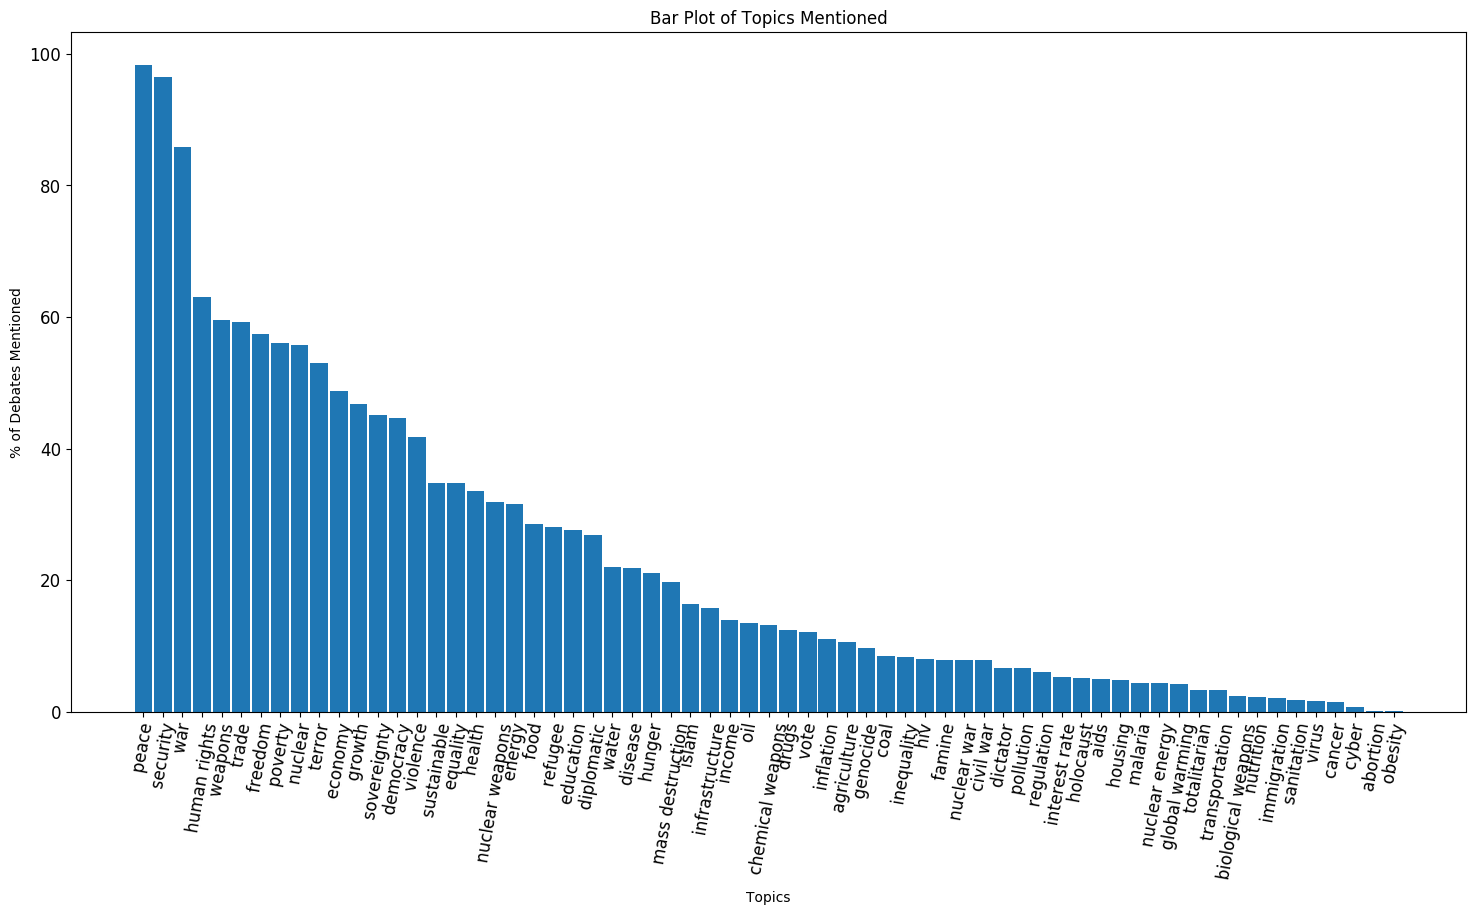

In [9]:
topics = [' nuclear', ' weapons', ' nuclear weapons', ' chemical weapons', 
          ' biological weapons', ' mass destruction', ' peace', ' war',
          ' nuclear war', ' civil war', ' terror', ' genocide', ' holocaust',
          ' water', ' famine', ' disease', ' hiv', ' aids', ' malaria', ' cancer',
          ' poverty', ' human rights', ' abortion', ' refugee', ' immigration',
          ' equality', ' democracy', ' freedom', ' sovereignty', ' dictator',
          ' totalitarian', ' vote', ' energy', ' oil',  ' coal',  ' income',
          ' economy', ' growth', ' inflation', ' interest rate', ' security',
          ' cyber', ' trade', ' inequality', ' pollution', ' global warming',
          ' hunger', ' education', ' health', ' sanitation', ' infrastructure',
          ' virus', ' regulation', ' food', ' nutrition', ' transportation',
          ' violence', ' agriculture', ' diplomatic', ' drugs', ' obesity',
          ' islam', ' housing', ' sustainable', 'nuclear energy']

dictionary = {}

for i in topics:    
    dictionary[i] = data['year'][data['text'].str.contains(i)].count() / len(data) * 100

sorted_dictionary = sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)

labels = [i[0] for i in sorted_dictionary]
values = [i[1] for i in sorted_dictionary]
xs = np.arange(len(labels))

width = .9
plt.figure(figsize=(18, 9))
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xticks(rotation=80)
plt.xlabel('Topics')
plt.ylabel('% of Debates Mentioned')
plt.title('Bar Plot of Topics Mentioned')

plt.bar(xs, values, width, align='center')
plt.xticks(xs, labels)
plt.show()

In [10]:
# Percentage of time mentioned in a debate
sorted_dictionary

[(' peace', 98.386446147640186),
 (' security', 96.450181524808386),
 (' war', 85.814172381336562),
 (' human rights', 63.10340190937206),
 (' weapons', 59.56702971628345),
 (' trade', 59.230872663708489),
 (' freedom', 57.442517144009685),
 (' poverty', 56.070996369503831),
 (' nuclear', 55.761731881134871),
 (' terror', 53.072475460535159),
 (' economy', 48.810004033884631),
 (' growth', 46.739276590022861),
 (' sovereignty', 45.085383891354041),
 (' democracy', 44.681995428264088),
 (' violence', 41.764152211913405),
 (' sustainable', 34.839316928869167),
 (' equality', 34.82587064676617),
 (' health', 33.54847384698131),
 (' nuclear weapons', 31.840796019900498),
 (' energy', 31.531531531531531),
 (' food', 28.506118058356865),
 (' refugee', 28.143068441575902),
 (' education', 27.685894850073957),
 (' diplomatic', 26.892564205997044),
 (' water', 22.038456366814575),
 (' disease', 21.796423288960604),
 (' hunger', 21.070324055398682),
 (' mass destruction', 19.698803280892832),
 (

In [11]:
# UN Members
data['country'].unique()

array(['MDV', 'FIN', 'NER', 'URY', 'ZWE', 'PHL', 'SDN', 'RUS', 'CHN',
       'ESP', 'SUR', 'ARG', 'SLV', 'MYS', 'NPL', 'PRT', 'COL', 'BLR',
       'MAR', 'LCA', 'EGY', 'MEX', 'BEL', 'BRN', 'RWA', 'CAN', 'ALB',
       'GRC', 'KNA', 'GUY', 'LBR', 'ATG', 'MOZ', 'JPN', 'YDYE', 'GAB',
       'BGD', 'SWE', 'TUR', 'TCD', 'SYR', 'CMR', 'JAM', 'LUX', 'ITA',
       'AGO', 'CRI', 'CSK', 'BFA', 'MNG', 'BHR', 'HTI', 'OMN', 'CIV',
       'TGO', 'CYP', 'MUS', 'MMR', 'ARE', 'GTM', 'GRD', 'LBY', 'LKA',
       'TZA', 'SGP', 'NOR', 'LAO', 'ISL', 'AFG', 'CHL', 'DMA', 'UKR',
       'KEN', 'BLZ', 'FRA', 'MLI', 'VCT', 'VEN', 'MLT', 'GHA', 'GIN',
       'GBR', 'ISR', 'YUG', 'BRB', 'IRQ', 'HUN', 'AUT', 'POL', 'GNB',
       'BWA', 'MRT', 'SWZ', 'DNK', 'DOM', 'MDG', 'NIC', 'BDI', 'CUB',
       'IRN', 'PAK', 'SEN', 'BGR', 'YEM', 'STP', 'NLD', 'VUT', 'BOL',
       'PNG', 'SLB', 'DEU', 'ROU', 'KHM', 'TUN', 'BRA', 'IND', 'IDN',
       'AUS', 'COD', 'HND', 'GNQ', 'FJI', 'IRL', 'DZA', 'USA', 'LSO',
       'GMB', 'PER'

In [12]:
# count number of debates in which a nation participates
countries = data['year'].groupby(data['country']).count()
countries = pd.DataFrame(countries.reset_index(drop=False))
countries.columns = ['country', 'num speeches']

print('Most Vocal Member Nations')
print('max number of speeches given:', countries['num speeches'].max())
print(countries[countries['num speeches'] == countries['num speeches'].max()].country.unique())
print()

countries = countries.sort_values(by='num speeches')
print('Least Vocal Member Nations')
print('min number of speeches given:', countries['num speeches'].min())
print(countries.country[:10].unique().tolist())

Most Vocal Member Nations
max number of speeches given: 45
['AFG' 'ALB' 'ARG' 'AUS' 'AUT' 'BDI' 'BEL' 'BFA' 'BGR' 'BLR' 'BOL' 'BRA'
 'CAN' 'CHL' 'CHN' 'COG' 'COL' 'CUB' 'CYP' 'DZA' 'ECU' 'ESP' 'ETH' 'FIN'
 'FRA' 'GBR' 'GHA' 'GRC' 'GTM' 'HUN' 'IDN' 'IND' 'IRL' 'IRN' 'IRQ' 'ISL'
 'ISR' 'ITA' 'JAM' 'JOR' 'JPN' 'LAO' 'LKA' 'MAR' 'MEX' 'MNG' 'MRT' 'MUS'
 'MYS' 'NGA' 'NLD' 'NPL' 'NZL' 'PAK' 'PER' 'PHL' 'POL' 'QAT' 'ROU' 'RUS'
 'RWA' 'SDN' 'SLV' 'SYR' 'TUN' 'TUR' 'TZA' 'UKR' 'URY' 'USA' 'VEN' 'YEM']

Least Vocal Member Nations
min number of speeches given: 5
['SSD', 'EU', 'MNE', 'KIR', 'TLS', 'VAT', 'CHE', 'TON', 'TUV', 'NRU']


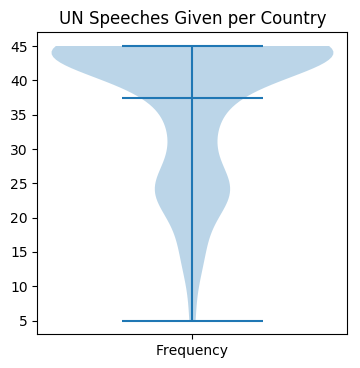

In [13]:
# Plot distribution of number of speeches per country
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
all_data = [countries['num speeches']]
axes.violinplot(countries['num speeches'], showmeans=True, showmedians=False)
axes.set_title('UN Speeches Given per Country')

plt.setp(axes, xticks=[y+1 for y in range(len(all_data))], xticklabels=['Frequency'])
plt.show()

In [14]:
# Plot a horizontal bar graph displaying the frequency of a given topic by country
def freqMentioned (df, country_list, topic_list, colors):
    data = df.loc[df['country'].isin(country_list)]

    for i in topic_list:
        data[i] = data['text'].str.contains(i)
        data[i].loc[data[i] == False] = np.nan

    country = country_list[0]
    data_out = pd.DataFrame(data.loc[data['country'] == country].count())
    data_out = (data_out.T)[topic_list]
    
    # sort the columns by summed occurence in countries specified
    countries = country_list.copy()
    countries.remove(country)

    for i in countries:
        a = pd.DataFrame(data.loc[data['country'] == i].count())
        a = (a.T)[topic_list].copy()
        data_out = pd.concat([data_out, a], axis=0)

    dictionary = {}
    
    for i in topic_list:
        dictionary[i] = data_out[i].sum()
        
    sorted_dictionary = sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)
    data_out = data_out[[i[0] for i in sorted_dictionary]]
    data_out.index = country_list
    data_out.T.plot(kind="barh", width=.6, stacked=True, figsize = (10, len(topic_list)/3), color=colors).legend(bbox_to_anchor=(1, 1))
    
    return data_out

/Users/JPhilleo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/JPhilleo/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/JPhilleo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,security,peace,war,nuclear,weapons,human rights,terror,freedom,trade,economy,...,malaria,pollution,housing,global warming,virus,immigration,cancer,nutrition,sanitation,transportation
USA,44,45,43,39,43,40,37,40,32,32,...,5,6,1,1,1,1,1,1,1,1
RUS,45,45,42,40,41,32,33,30,15,14,...,2,0,3,0,2,0,0,1,0,0
GBR,45,44,43,29,29,29,26,29,33,24,...,2,1,3,4,0,0,0,1,1,0
FRA,45,45,43,32,33,35,29,28,25,15,...,3,2,1,3,1,0,1,0,1,0
CHN,45,45,41,36,28,12,17,13,33,35,...,0,1,0,0,0,2,1,0,0,1


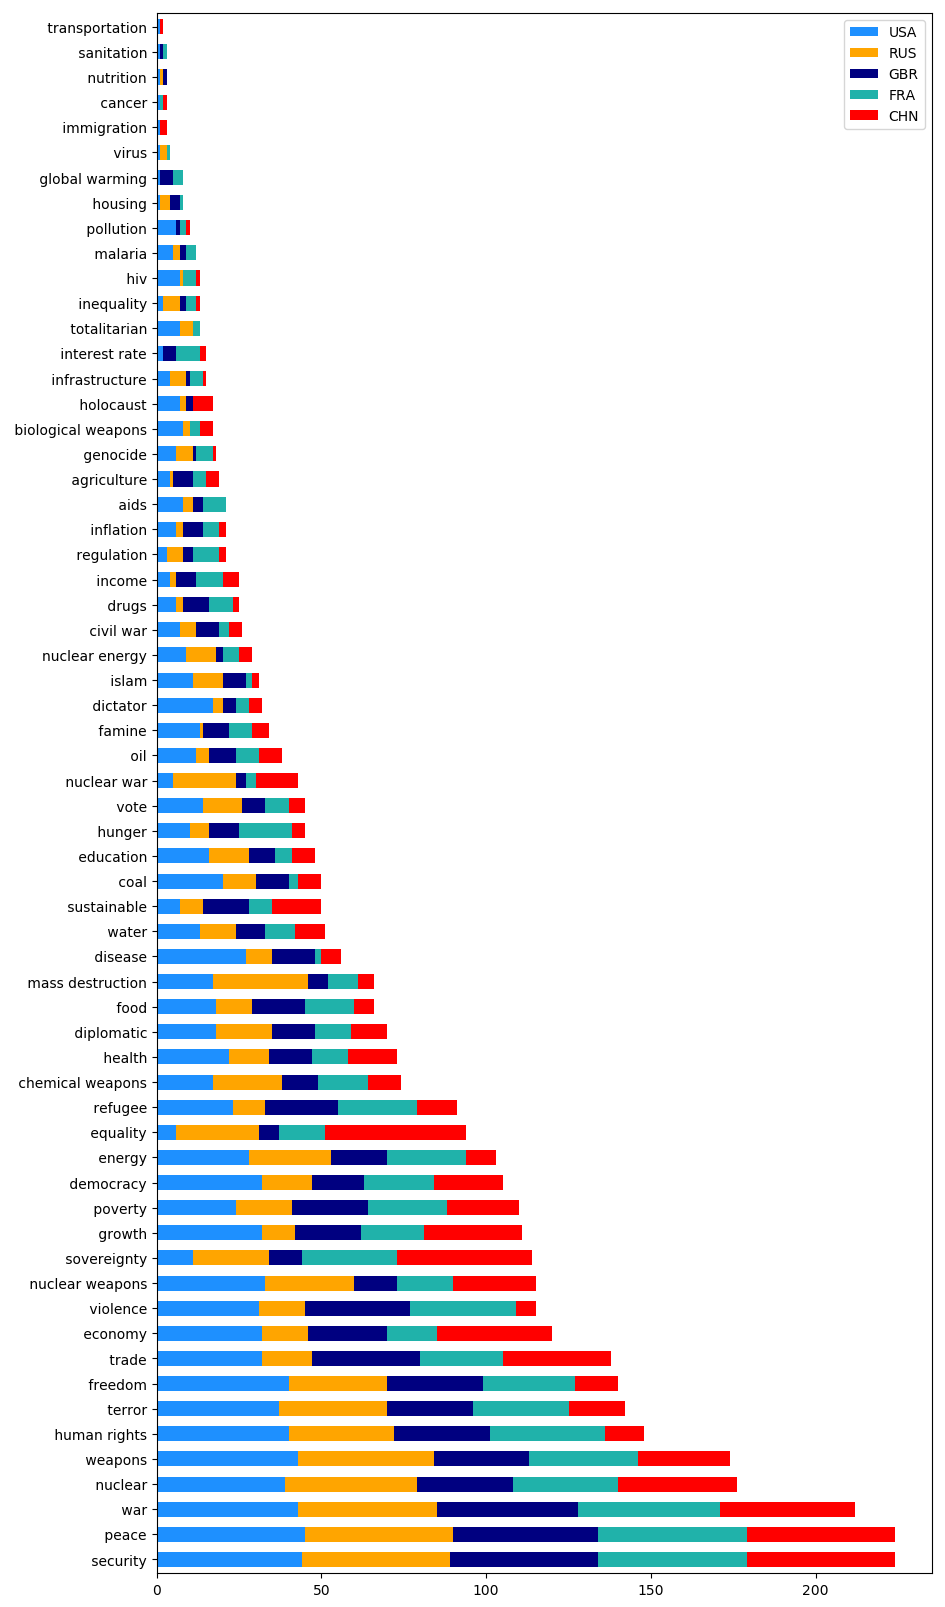

In [15]:
# Permanent Members of the UN Security Council
sec_council = ['USA', 'RUS', 'GBR', 'FRA', 'CHN']

topics = []
for i in sorted_dictionary:
    if i[1] > 1:
        topics.append(i[0])

colors = ['dodgerblue', 'orange', 'navy', 'lightseagreen', 'r']

freqMentioned(data, sec_council, topics, colors)

There are a lot of interesting insights to unpack from this plot. First, it's interesting to note that the permanent members of the UN Security Council (and almost all members of the UN for that matter) are primarily concerned with: **Peace**, **Security**, **War**, **Nuclear Weapons**, **Terrorism**, and **Human Rights**. The others goals -- e.g. education, food, transportation, sustainability, disease, health, sanitation, etc. -- receive a comparably small amount of attention.

The distribution of UN Security Council discussion is interesting too.

**China**, predictably, has little to say on **human rights**, **freedom**, and **global violence**; however, it is surprisingly outspoken about **equality**, **sovereignty**, **trade**, **growth**, and **sustainability**.

The US, France, and Great Britain are typically unified in their debate topics with some exceptions: **Great Britain** seems reluctant to talk about **sovereignty** and **nuclear energy**. At the risk of over-rationalizing, both of these avoidances make sense. For years nations within Great Britain and, more broadly, the United Kingdom have wanted and been denied independence; Great Britain cannot credibly advocate for sovereignty while it faces domestic turmoil in that same domain. Similarly, the use of nuclear power in Great Britain is somewhat controversial, which may explain why GBR is not vocal about nuclear power despite promoting general sustainability.

https://en.wikipedia.org/wiki/Nuclear_power_in_the_United_Kingdom#Public_opinion_and_protests

The **US**, expectedly, is an outsized peddler of **democracy**, **freedom**, **growth**, and **disease** while being rather quiet on **sustainability**, **equality**, and **sovereignty**.

Finally, **Russia** seems to enjoy talking about everything *except* **trade** (remember, it is often the recipient of international sanctions), **economic growth** (makes sense given its mediocre economic performance since 1970), **refugees**, and **food / famine**. 

/Users/JPhilleo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/JPhilleo/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/JPhilleo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,peace,conflict,united states,asia,human right,treaty,terror,partner,growth,democracy,...,tokyo,seoul,starvation,nuclear material,ally,grain,rice,south china sea,navy,dmz
USA,45,41,45,30,40,30,37,26,32,32,...,6,2,4,10,1,3,2,2,1,0
RUS,45,43,38,30,32,40,33,37,10,15,...,1,1,2,1,1,1,0,0,1,0
KOR,25,24,11,22,23,17,18,15,14,18,...,1,15,3,3,0,0,0,0,0,1
PRK,25,11,25,22,20,8,9,2,1,8,...,0,1,0,0,0,0,0,0,0,0
JPN,45,40,34,36,28,32,23,23,24,14,...,31,6,8,0,0,0,1,0,0,0
CHN,45,38,24,37,12,22,17,11,30,21,...,0,0,2,0,8,4,0,1,1,0


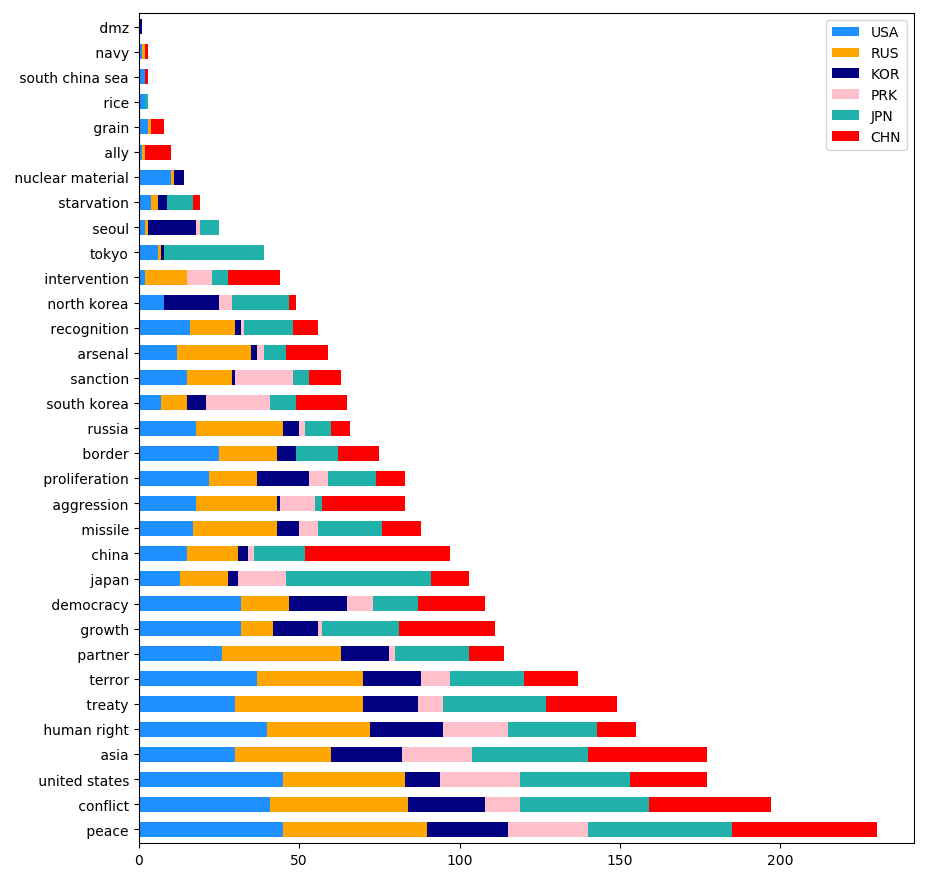

In [16]:
# Korea & Neighbors
countries = ['USA', 'RUS', 'KOR', 'PRK', 'JPN', 'CHN']

topics = [' united states', ' north korea', ' south korea', ' south china sea', ' asia', ' peace',
          ' navy', ' arsenal', ' aggression', ' treaty', ' dmz', ' missile',
          ' nuclear material', ' sanction', ' terror', ' border', ' seoul',
          ' growth', ' democracy', 'tokyo', ' intervention', ' human right',
          ' recognition', ' ally', ' partner', ' japan', ' china', ' proliferation',
          ' conflict', ' russia', ' rice', ' grain', ' starvation']

colors = ['dodgerblue', 'orange', 'navy', 'pink', 'lightseagreen', 'r']

freqMentioned(data, countries, topics, colors)

Again, there's a lot to unpack here. North Korea and South Korea seem reluctant to talk about peace or treaties while Japan is adament, vocal, and presumably concerned.

Though China, Russia, the US, and Japan refer to themselves more than any other country by far, South Korea is the largest "referer" to North Korea, and North Korea is similarly the largest "referer" to South Korea. Blame game much? North Korea is also vocal about human rights (unclear if its mentions are rebuttals for human rights abuses or ironic advocacy of the cause) and sanctions.

Another interesting observation is that China and Russia both refer to aggression more than any other country in the UN Security Council. Whether that's because they feel like the victim of aggression or because they are addressing claims of aggression is unclear; given both country's high discussion on peace, conflict, and intervention, the answer is probably a mix of both.

/Users/JPhilleo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/JPhilleo/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/JPhilleo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,peace,arab,israel,conflict,terror,iraq,lebanon,palestine,syria,jerusalem,...,judaism,sunni,solar,shia,mecca,opec,foreign investment,desalination,gender equality,free speech
USA,45,25,29,41,37,26,14,8,12,5,...,0,3,2,4,0,1,0,0,0,1
ISR,45,43,45,39,42,22,36,17,37,28,...,3,1,3,0,0,0,0,2,0,0
IRQ,43,40,25,36,29,45,19,27,9,13,...,0,1,0,1,0,1,1,0,1,0
EGY,43,43,41,40,26,29,23,33,30,27,...,2,0,0,0,2,0,0,0,0,0
PSE,18,17,18,17,13,7,3,18,7,16,...,1,0,0,0,0,0,0,0,0,0
JOR,45,44,44,39,23,29,26,38,24,34,...,1,0,0,0,0,0,0,0,0,0
LBN,41,39,41,36,26,11,41,28,25,10,...,0,0,0,0,1,0,0,0,0,0
SYR,45,45,45,38,28,24,30,23,44,25,...,0,0,0,0,1,0,1,0,0,0


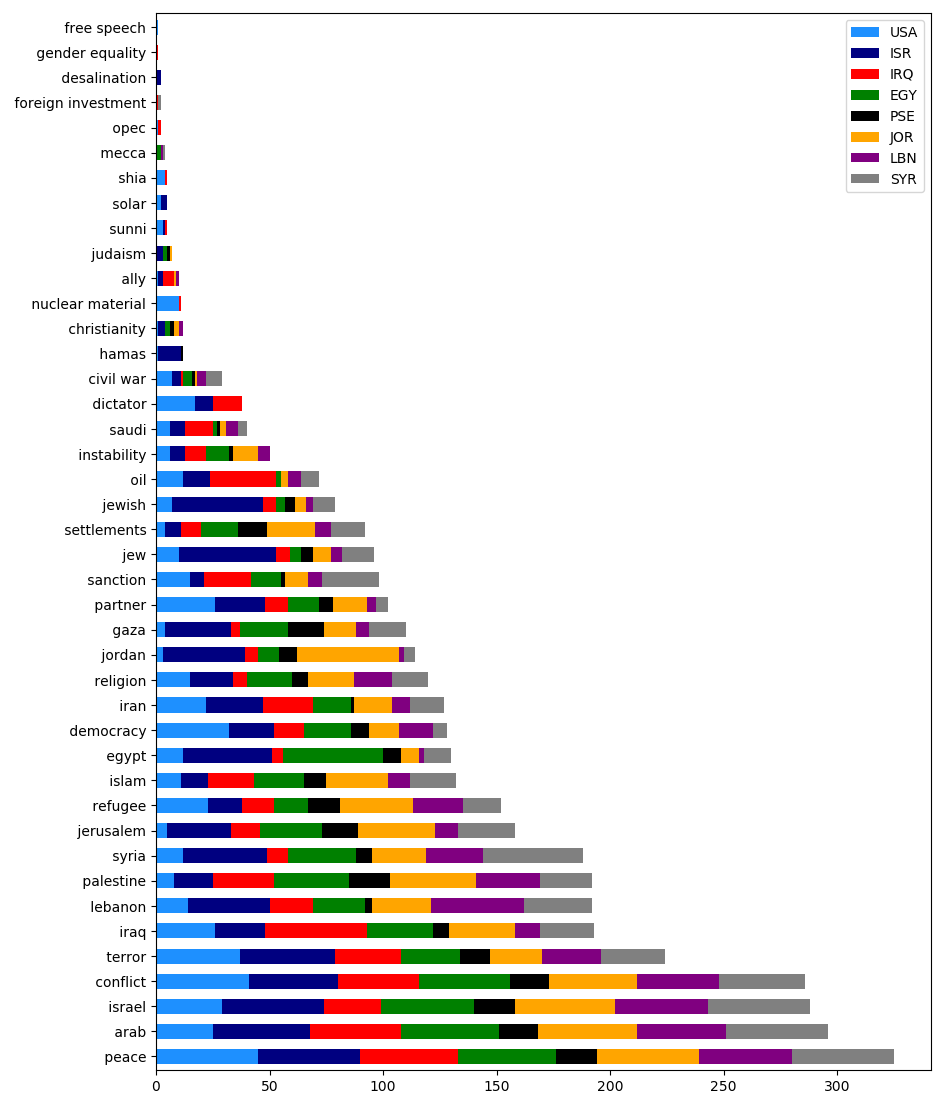

In [17]:
# Middle East
countries = ['USA', 'ISR', 'IRQ', 'EGY', 'PSE', 'JOR', 'LBN', 'SYR']

topics = [' iran', ' iraq', ' israel', ' egypt', ' palestine', ' terror', ' jordan',
          ' refugee', ' hamas', ' lebanon', ' saudi', ' oil', ' nuclear material',
          ' sanction', ' settlements', ' gaza', ' opec', ' foreign investment',
          ' desalination', ' syria', ' dictator', ' democracy', ' gender equality',
          ' islam', ' jewish', ' judaism', ' jerusalem', ' religion', ' christianity',
          ' mecca', ' sunni', ' shia', ' solar', ' instability', ' civil war', ' peace',
          ' partner', ' ally', ' arab', ' conflict', ' jew', ' free speech']

colors = ['dodgerblue', 'navy', 'r', 'green', 'black', 'orange', 'purple', 'grey']

freqMentioned(data, countries, topics, colors)

This might not be the best basket of words or countries, but it's interesting nonetheless. The Middle East is a bit too complicated for me to delve into here, but feel free to look around!

/Users/JPhilleo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/JPhilleo/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/JPhilleo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,fruit,water,climate change,coal,oil,tariff,iron,gas,wood,paper,...,diamond,glass,copper,rubber,tin,magnesium,lithium,aluminum,nickel,siicon
USA,6,13,8,20,12,8,9,9,0,3,...,0,1,0,0,0,0,0,0,0,0
RUS,17,11,6,11,4,3,3,1,2,5,...,0,0,0,0,1,0,0,0,0,0
CAN,4,12,8,8,6,6,4,3,2,4,...,1,0,0,0,0,0,0,0,0,0
NGA,3,10,7,0,11,2,4,0,6,0,...,1,0,0,1,0,0,0,0,0,0
IND,8,10,12,6,6,4,6,2,6,4,...,0,0,1,0,0,0,0,0,0,0
BRA,23,2,10,3,8,11,3,7,6,0,...,0,0,0,0,0,0,0,0,0,0
CHN,10,9,8,7,7,3,3,0,0,5,...,0,0,0,0,0,0,0,0,0,0


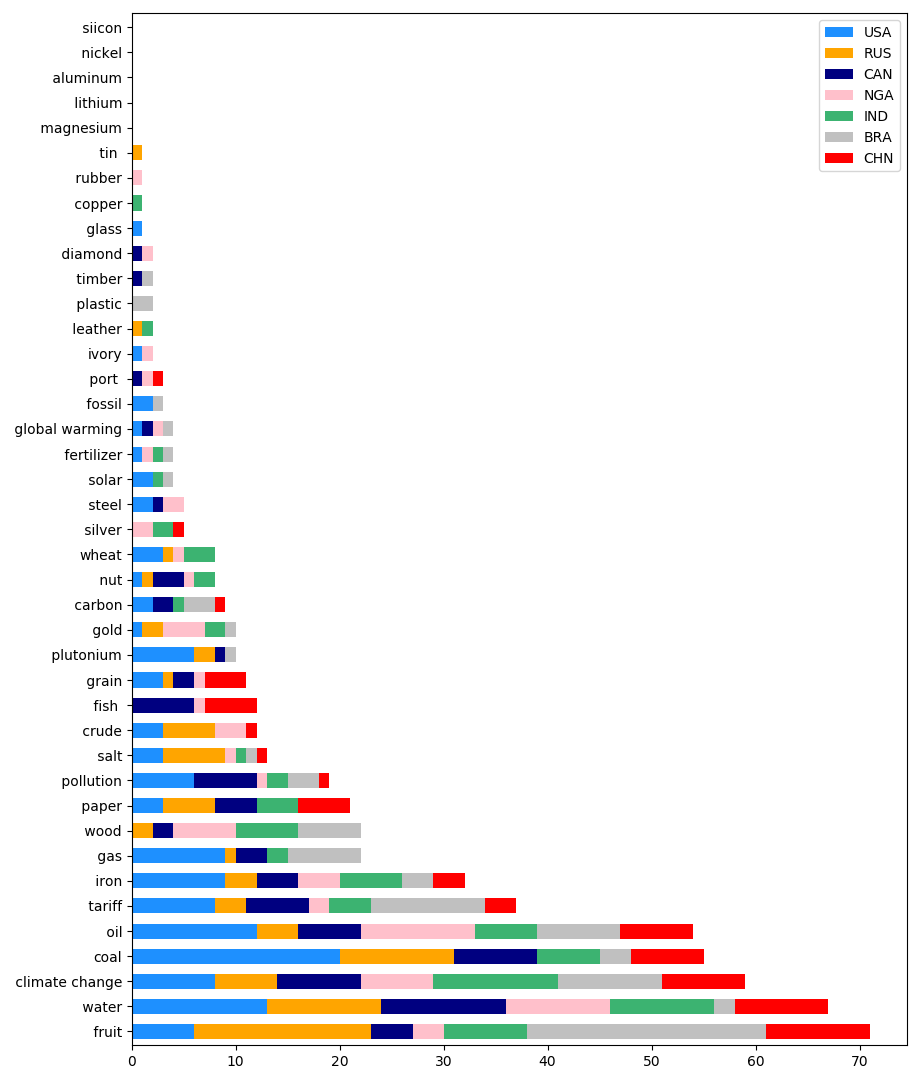

In [18]:
# BRINC + USA + Canada
countries = ['USA', 'RUS', 'CAN', 'NGA', 'IND', 'BRA', 'CHN']

topics = [' oil', ' water', ' crude', 'coal', ' gas', ' solar', 'wheat',
          ' tin ', ' diamond', ' wood', 'ivory', ' plutonium', ' fossil',
          ' pollution', ' carbon', ' global warming', ' climate change', 
          ' fertilizer', ' aluminum', ' steel', ' iron', ' timber', ' siicon',
          ' gold', ' silver', ' copper', ' lithium', ' salt', ' magnesium',
          ' rubber', ' paper', ' plastic', ' glass', ' nickel', ' grain',
          ' fruit', ' tariff', ' fish ', ' port ', ' leather', ' nut']

colors = ['dodgerblue', 'orange', 'navy', 'pink', 'mediumseagreen', 'silver', 'r']

freqMentioned(data, countries, topics, colors)

So, this is pretty weird. I wasn't expecting fruit to be a high-priority item on the UN's agenda (higher than water and climate change?!), but it is. Thanks Brazil and Russia.

Fruits aside, country topic interest is largely intuitive and sensible. The US cares about cheap energy and is consequently vocal about oil, coal, and gas. Canada and China both do a lot of fishing, and consequently care about international regulations on fish. India has 1.3B people and is projected to be most impacted by higher global temperatures; it thus has opinions on climate change. etc.

To me, the oddest part of this graph is the lack of discussion about lithium, aluminum, magnesium, and other such metals. In the digital era, we might expect the chemical materials underpinning almost all of our electronic devices and batteries to be a strategic asset.

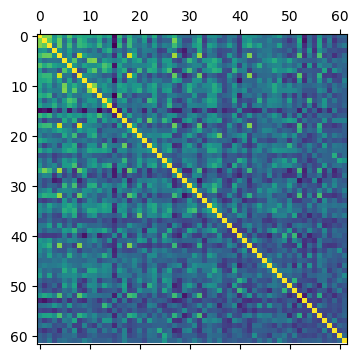

In [19]:
topics = []
for i in sorted_dictionary:
    if i[1] > 1:
        topics.append(i[0])

def textFreq(df, topic_list):
    data = df.copy()
    for i in topic_list:
        data[i] = data['text'].apply(lambda x: x.count(i))
    return data

def GroupFreq(df, topic_list, grouping_column):
    topic_freq = textFreq(df, topic_list)
    topic_list.append(grouping_column)
    topic_freq = topic_freq[topic_list]
    topic_freq_col = topic_freq.groupby(topic_freq[grouping_column]).sum()
    return topic_freq_col

topic_freq_county = GroupFreq(data, topics, 'country')
plt.matshow(topic_freq_county.corr())
topic_freq_year = GroupFreq(data, topics, 'year')

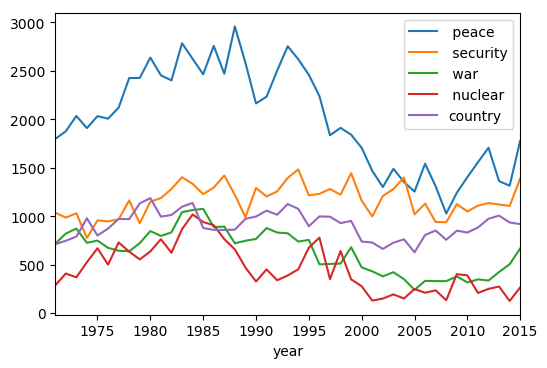

In [20]:
topics_keep = []
for i in topic_freq_year.columns:
    if topic_freq_year[i].sum() > 20000:
        topics_keep.append(i)

topic_freq_year[topics_keep].plot()

Peace has and continues to be the most discussed topic at the UN. This makes sense, but it's interesting to note that occurence of 'peace' has declined from a peak in 1987, though it's been rebounding since.

Also interesting is the decline in discussion of 'nuclear' and 'war'. This might be why 'peace' discussions have declined (less war means fewer calls for 'peace'), or it may indicate the achievement of a stable, long-term geopolitical stand-off on major conflict and nuclear weapons.


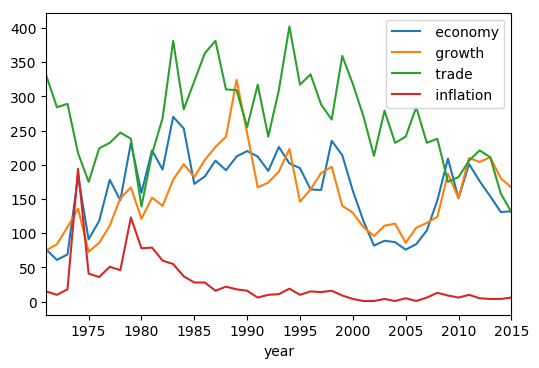

In [21]:
topic_freq_year[[' economy', ' growth', ' trade', ' inflation']].plot()

Discussion on 'economy' and 'growth' appear to be highly correlated, with talk of growth having plummeted since 2000. During the global recession in 2008-2010 and the ensuing Eurozone crisis, talk of growth and economy did rise, but has again lagged since 2012. Given the sluggish economy, does lack of discussion suggest UN delegates care less about economic growth than in the past or that they feel increasingly unable to affect it?

As an aside, talk of trade has also fallen dramatically since 2000. This trend likely reflects the diminishing returns and opportunities for more trade as well as the strong political realities that remain. Similarly, international concerns about inflation largely died off after the severe cost-push inflation of the late 70s and early 80s.

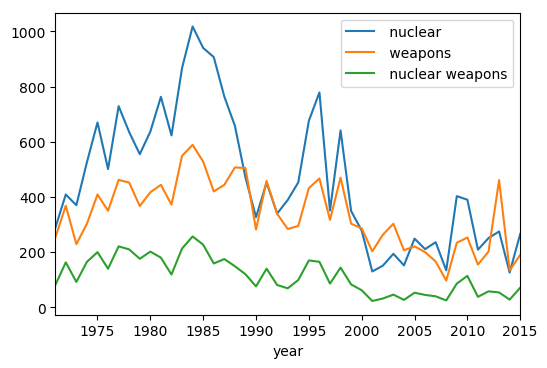

In [22]:
topic_freq_year[[' nuclear', ' weapons', ' nuclear weapons']].plot()

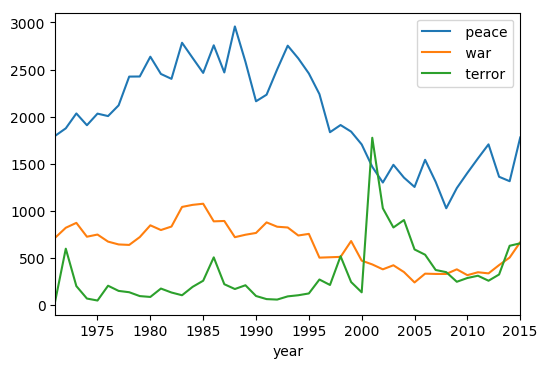

In [23]:
topic_freq_year[[' peace', ' war', ' terror']].plot()

Since 2001 (i.e. the 9/11 terrorist attack), discussion of "terror" -- including 'terrorism', 'terrorist', etc. has skyrocketed. While the focus on terror cooled from 2005-2013, recent developments e.g. ISIS? appear to have returned attention to the subject.

As noted before, the discussion of "peace" has fallen while the discussion of "war" has remained relatively constant. It is not yet clear how much of "war" refers to the "war on drugs" and "war on terror".

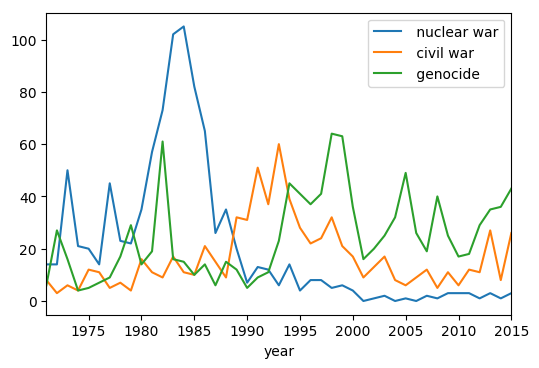

In [24]:
topic_freq_year[[' nuclear war', ' civil war', ' genocide']].plot()

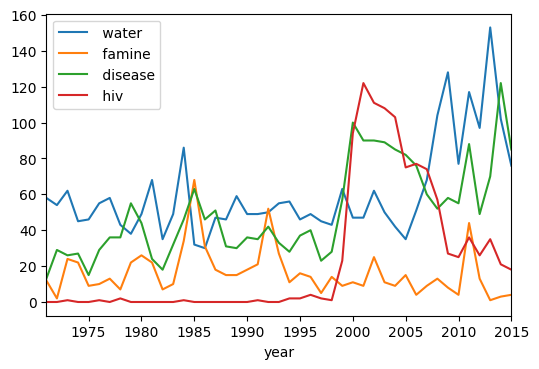

In [25]:
topic_freq_year[[' water', ' famine', ' disease', ' hiv']].plot()

The HIV crisis, which appears to have started ~1998 has been  effectively resolved by 2010 insofar as international attention is concerned. Meanwhile, "famine" has stayed constant while debate around "disease" and "water" have risen dramatically i.e. 2x in 8 years.

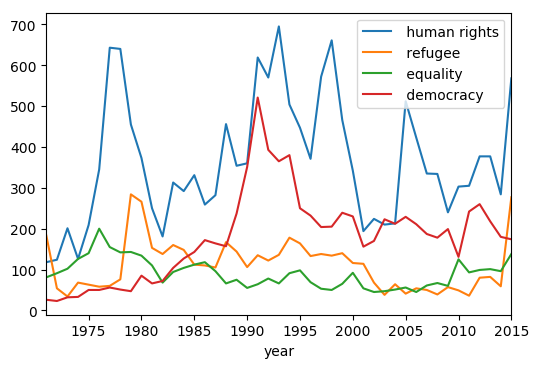

In [26]:
topic_freq_year[[' human rights', ' refugee', ' equality', ' democracy']].plot()

Human rights are always an important discussion, but are spotlighted by well-publicized global atrocities (e.g. genocides, refugee crises, etc). In 2015, it looks like the refugee crisis may have reinvigorated the human rights debate.

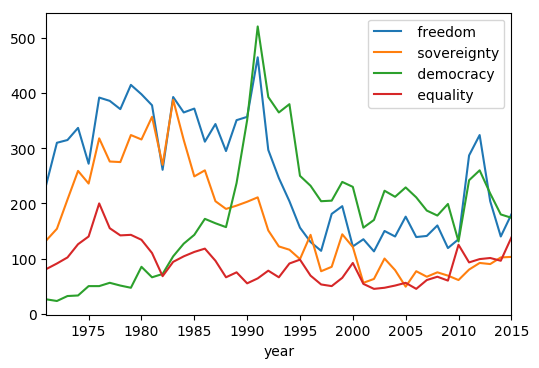

In [27]:
topic_freq_year[[' freedom', ' sovereignty', ' democracy', ' equality']].plot()

From 1970-1990, "freedom" and "sovereignty" were closely correlated. Then, in 1990 -- at the collapse of the USSR -- "freedom" became more closely associated with "democracy" and has remained so since.

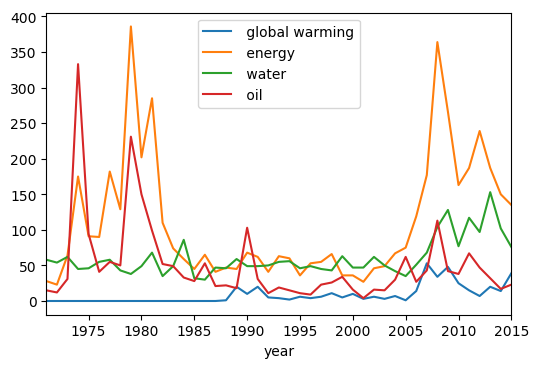

In [28]:
topic_freq_year[[' global warming', ' energy', ' water', ' oil']].plot()

Until 1985, "oil" and "energy" were closely linked. Since then, discussion of "energy" has diverged from "oil" -- probably as new forms of fuel (e.g. natural gas, smart coal, solar energy, etc.) have become available and cost effective. If anything, "oil" now appears to most closely track "global warming".

In [29]:
# Top five advocates per cause
for i in topic_freq_county.columns:
    topic_freq_county = topic_freq_county.sort_values(by=i, ascending=False)
    print(i)
    print(topic_freq_county.index.tolist()[:5])
    print()

 peace
['ISR', 'JPN', 'EGY', 'CHN', 'NPL']

 security
['LBY', 'IRQ', 'BHR', 'RUS', 'KWT']

 war
['RUS', 'CHN', 'USA', 'ALB', 'ISR']

 human rights
['NLD', 'AUT', 'IRL', 'CRI', 'DEU']

 weapons
['RUS', 'UKR', 'USA', 'IRN', 'SWE']

 trade
['JAM', 'URY', 'TTO', 'BRA', 'LCA']

 freedom
['USA', 'ALB', 'CRI', 'NLD', 'LBY']

 poverty
['BGD', 'PER', 'TZA', 'NPL', 'DOM']

 nuclear
['RUS', 'UKR', 'PAK', 'CHN', 'MNG']

 terror
['ISR', 'LBY', 'LKA', 'USA', 'SYR']

 economy
['CHN', 'SGP', 'JAM', 'BRA', 'JPN']

 growth
['JAM', 'USA', 'DEU', 'CHN', 'IND']

 sovereignty
['CUB', 'CHN', 'IRQ', 'KHM', 'VNM']

 democracy
['SLV', 'CRI', 'NIC', 'CHL', 'USA']

 violence
['IRL', 'VEN', 'SWE', 'SLV', 'URY']

 sustainable
['BRB', 'TJK', 'TTO', 'FIN', 'FSM']

 equality
['CHN', 'LBY', 'ROU', 'YEM', 'YUG']

 health
['KNA', 'BDI', 'GMB', 'CAN', 'SLV']

 nuclear weapons
['RUS', 'CHN', 'NZL', 'UKR', 'PAK']

 energy
['USA', 'DEU', 'AUS', 'AUT', 'TKM']

 food
['BGD', 'MWI', 'THA', 'GMB', 'KEN']

 refugee
['SDN', 'JPN',

In [30]:
# Top seven priorities for each UN member country
topic_freq_county = topic_freq_county.sort_index()
topic_freq_county = topic_freq_county.T

for i in topic_freq_county.columns:
    topic_freq_county = topic_freq_county.sort_values(by=i, ascending=False)
    print(i)
    print(topic_freq_county.index.tolist()[:7])
    print()

AFG
[' peace', ' security', ' war', ' islam', ' terror', ' nuclear', ' weapons']

AGO
[' peace', ' security', ' war', ' poverty', ' sovereignty', ' terror', ' trade']

ALB
[' peace', ' security', ' war', ' freedom', ' weapons', ' sovereignty', ' terror']

AND
[' peace', ' war', ' human rights', ' terror', ' education', ' security', ' democracy']

ARE
[' peace', ' security', ' war', ' nuclear', ' terror', ' sovereignty', ' weapons']

ARG
[' peace', ' security', ' terror', ' nuclear', ' war', ' human rights', ' sovereignty']

ARM
[' peace', ' security', ' genocide', ' war', ' human rights', ' terror', ' economy']

ATG
[' peace', ' security', ' trade', ' war', ' poverty', ' terror', ' sustainable']

AUS
[' peace', ' security', ' nuclear', ' human rights', ' weapons', ' war', ' trade']

AUT
[' peace', ' security', ' human rights', ' nuclear', ' war', ' terror', ' weapons']

AZE
[' security', ' peace', ' sovereignty', ' refugee', ' war', ' terror', ' economy']

BDI
[' peace', ' security', '

Well folks, that's a wrap!

I hope my introductory kernel was of some help and interest. 